In [375]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval

In [376]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_onnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Usage_Categorical.csv")
voice_onnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Usage_Categorical.csv")
voice_offnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Usage_Categorical.csv")
voice_offnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [377]:
# locations
bb_location = pd.read_csv("data/user_profile/BB_USAGE_Locations_of_Users.csv")
voice_onnet_incoming_location = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Locations_of_Users.csv")
voice_onnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Locations_of_Users.csv")
voice_offnet_incoming_location = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Locations_of_Users.csv")
voice_offnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")
voice_IDD_incoming_location = pd.read_csv("data/user_profile/VOICE_IDD_INCOMING_Locations_of_Users.csv")
peo_tv_location = pd.read_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

In [378]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics_final.csv")

In [379]:
# VAS
voice_agg_df = pd.read_csv("data/user_profile/VAS_Voice_Aggregated.csv")
bb_agg_df = pd.read_csv("data/user_profile/VAS_BB_Aggregated.csv")
peo_agg_df = pd.read_csv("data/user_profile/VAS_Peo_Aggregated.csv")
other_agg_df = pd.read_csv("data/user_profile/VAS_Other_Aggregated.csv")

In [380]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [381]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/new/BB_extra_GB_usage.csv")

In [382]:
# All customers reference
all_users_df = pd.read_csv("data/new/account_no_map_reduced.csv")

# Data perapration

In [383]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  27555 non-null  object
 1   ACCOUNT_NUM.hash   27555 non-null  object
 2   CUSTOMER_REF.hash  27555 non-null  object
dtypes: object(3)
memory usage: 645.9+ KB


In [384]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)
# bb_usage

In [385]:
voice_onnet_incoming_usage = voice_onnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_incoming_usage

In [386]:
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_outgoing_usage

In [387]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_offnet_incoming_usage

In [388]:
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_offnet_outgoing_usage

In [389]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_IDD_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_incoming_usage

In [390]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_IDD_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_outgoing_usage

In [391]:
peo_tv_usage = peo_tv_usage[['Phone_Number.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#peo_tv_usage.drop_duplicates("Phone_Number.hash", inplace=True)
#peo_tv_usage

In [392]:
# user location 
print(bb_location.shape)
print(voice_onnet_incoming_location.shape)
print(voice_onnet_outgoing_location.shape)
print(voice_offnet_incoming_location.shape)
print(voice_offnet_outgoing_location.shape)
print(voice_IDD_incoming_location.shape)
print(peo_tv_location.shape)

(1306, 3)
(3236, 3)
(3307, 3)
(3329, 3)
(3191, 3)
(1197, 3)
(1428, 4)


In [393]:
# location from voice onnet outgoing
# justification: this has the max no of subscribers
voice_onnet_outgoing_location = voice_onnet_outgoing_location[['event_source.hash','Location_Identifier']]
voice_onnet_outgoing_location.drop_duplicates("event_source.hash", inplace=True)
#voice_onnet_outgoing_location

In [394]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

# User Profile : Usage

In [395]:
usage_df = all_users_df.merge(voice_onnet_outgoing_usage,how='left', on='event_source.hash')

In [396]:
usage_df = usage_df.merge(voice_onnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical_x':'ONNET_OUTGOING_Categorical', 'Usage_Rating_Categorical_y':'ONNET_INCOMING_Categorical',
                         'Usage_Rating_Scaled_x':'ONNET_OUTGOING_Scaled','Usage_Rating_Scaled_y':'ONNET_INCOMING_Scaled',
                         'Outlier_x':'ONNET_OUTGOING_Outlier','Outlier_y':'ONNET_INCOMING_Outlier'}, inplace="True")

In [397]:
usage_df = usage_df.merge(voice_offnet_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_OUTGOING_Categorical','Usage_Rating_Scaled':'OFFNET_OUTGOING_Scaled', 'Outlier':'OFFNET_OUTGOING_Outlier'}, inplace="True")

In [398]:
usage_df = usage_df.merge(voice_offnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_INCOMING_Categorical','Usage_Rating_Scaled':'OFFNET_INCOMING_Scaled','Outlier':'OFFNET_INCOMING_Outlier'}, inplace="True")

In [399]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")

In [400]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")

In [401]:
usage_df = usage_df.merge(peo_tv_usage,how='left', left_on='event_source.hash', right_on='Phone_Number.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop('Phone_Number.hash', axis=1, inplace=True)

In [402]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")

In [403]:
# merge user location identifier
usage_df = usage_df.merge(voice_onnet_outgoing_location,how='left', on='event_source.hash')

# Adding New Data

### Adding demographics

In [404]:
demo_df.drop(["CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [405]:
usage_df = usage_df.merge(demo_df,how='left', on='event_source.hash')

In [406]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

,BIRTH_YEAR,AGE
count,4104.000000,4104.000000
mean,1964.109893,56.890107
std,15.177714,15.177714
min,1900.000000,20.000000
25%,1953.000000,45.000000
50%,1965.000000,56.000000
75%,1976.000000,68.000000
max,2001.000000,121.000000


<AxesSubplot:ylabel='Density'>

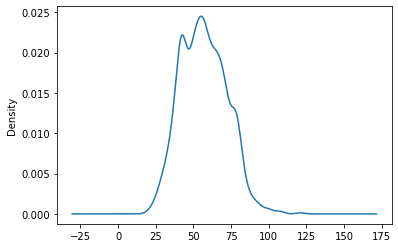

In [407]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

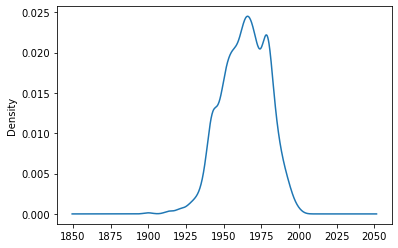

In [408]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

### Demographic Information

- 2266 users have demographic info (age, Birth Year, Gender)
- Users born from **1900**-2000 
- Age vary from 21 y.o. to **121 y.o**
- Mean Age - 56 y.o
- 75% of users are less than 67 y.o.
- Mostly middle aged, and aged customers

## Voice Usage Bins

In [409]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (incoming=="NO" and outgoing!="NO") or (incoming!="NO" and outgoing=="NO"):
        return "LOW"
    if incoming=="NO" and outgoing=="NO":
        return "NO"

In [410]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [411]:
usage_df["ONNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["ONNET_INCOMING_Categorical"], x["ONNET_OUTGOING_Categorical"]), axis=1)

In [412]:
usage_df["OFFNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["OFFNET_INCOMING_Categorical"], x["OFFNET_OUTGOING_Categorical"]), axis=1)

In [413]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [414]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["NO"] > 2:
        return "NO"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [415]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [416]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([x["ONNET_Overall_Categorical"], x["OFFNET_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [417]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,...,BB_Categorical,BB_Scaled,Location_Identifier,GENDER,BIRTH_YEAR,AGE,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical


## Subscrition Types

In [418]:
sub_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [419]:
usage_df = usage_df.merge(sub_df,how='left',on=["event_source.hash"])

In [420]:
def check_product_level(voice,bb,tv):
    if voice!="NO": 
        if bb=="NO" and tv=="NO":
            return "SINGLE_PLAY"
        if bb != "NO" and tv == "NO":
            return "DOUBLE_PLAY_BV"
        if bb == "NO" and tv != "NO":
            return "DOUBLE_PLAY_PV"
        if bb != "NO" and tv != "NO":
            return "TRIPLE_PLAY"
    else:
        return "NO"

In [421]:
# test
check_product_level("LOW","HIGH","NO")

'DOUBLE_PLAY_BV'

In [422]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [423]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        return [f"VOICE_{usage[0]}", f"BB_{usage[1]}", f"TV_{usage[2]}"]
    else:
        return "ERR"

In [424]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [425]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [426]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
DOUBLE_PLAY_BV  TRIPLE_PLAY       9088
DOUBLE_PLAY_PV  TRIPLE_PLAY       6623
SINGLE_PLAY     TRIPLE_PLAY       2291
TRIPLE_PLAY     TRIPLE_PLAY       2096
4G              TRIPLE_PLAY        102
SINGLE_PLAY     DOUBLE_PLAY_BV      28
DOUBLE_PLAY_BV  DOUBLE_PLAY_BV      27
TRIPLE_PLAY     DOUBLE_PLAY_BV      19
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV      12
dtype: int64

In [427]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [428]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [429]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [430]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [431]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [432]:
usage_df["Sub_Type_State"].value_counts()

Actual     20286
Assumed     7269
Name: Sub_Type_State, dtype: int64

In [433]:
usage_df["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    9251
TRIPLE_PLAY       9248
DOUBLE_PLAY_PV    6635
SINGLE_PLAY       2319
4G                 102
Name: Sub_Type, dtype: int64

### Note

- Actual Subscription information - for **811** Subscribers only
- Assumed on usage - **2496**

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [434]:
voice_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
bb_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
peo_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
other_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [435]:
usage_df = usage_df.merge(voice_agg_df,how='left', on='event_source.hash')

In [436]:
usage_df = usage_df.merge(bb_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(peo_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(other_agg_df,how='left', on='event_source.hash')
usage_df.drop(['VAS_Count_x','VAS_Count_y'], axis=1, inplace=True)

## Subscription upgrades and Downgrades

In [437]:
promo_change_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [438]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  19648 non-null  object
 1   Sub_Update_Date    19648 non-null  object
 2   Sub_Update_Status  19648 non-null  object
 3   Sub_Update         19648 non-null  object
dtypes: object(4)
memory usage: 614.1+ KB


In [439]:
usage_df = usage_df.merge(promo_change_df,how='left', on='event_source.hash')

In [440]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       8571
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       6521
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       2052
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       1541
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY        376
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        197
                     TRIPLE_PLAY -> DOUBLE_PLAY_PV        111
Promotion Upgrade    4G -> 4G                             102
                     SINGLE_PLAY -> TRIPLE_PLAY            80
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY            66
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV         29
Promotion Upgrade    DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV       2
dtype: int64

<AxesSubplot:ylabel='None'>

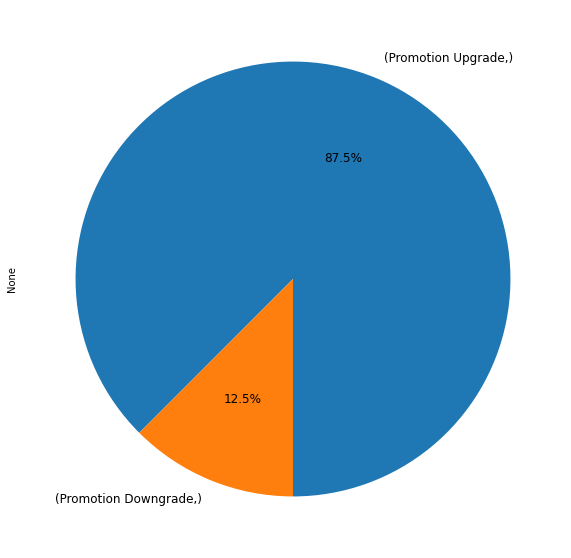

In [441]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

<AxesSubplot:ylabel='None'>

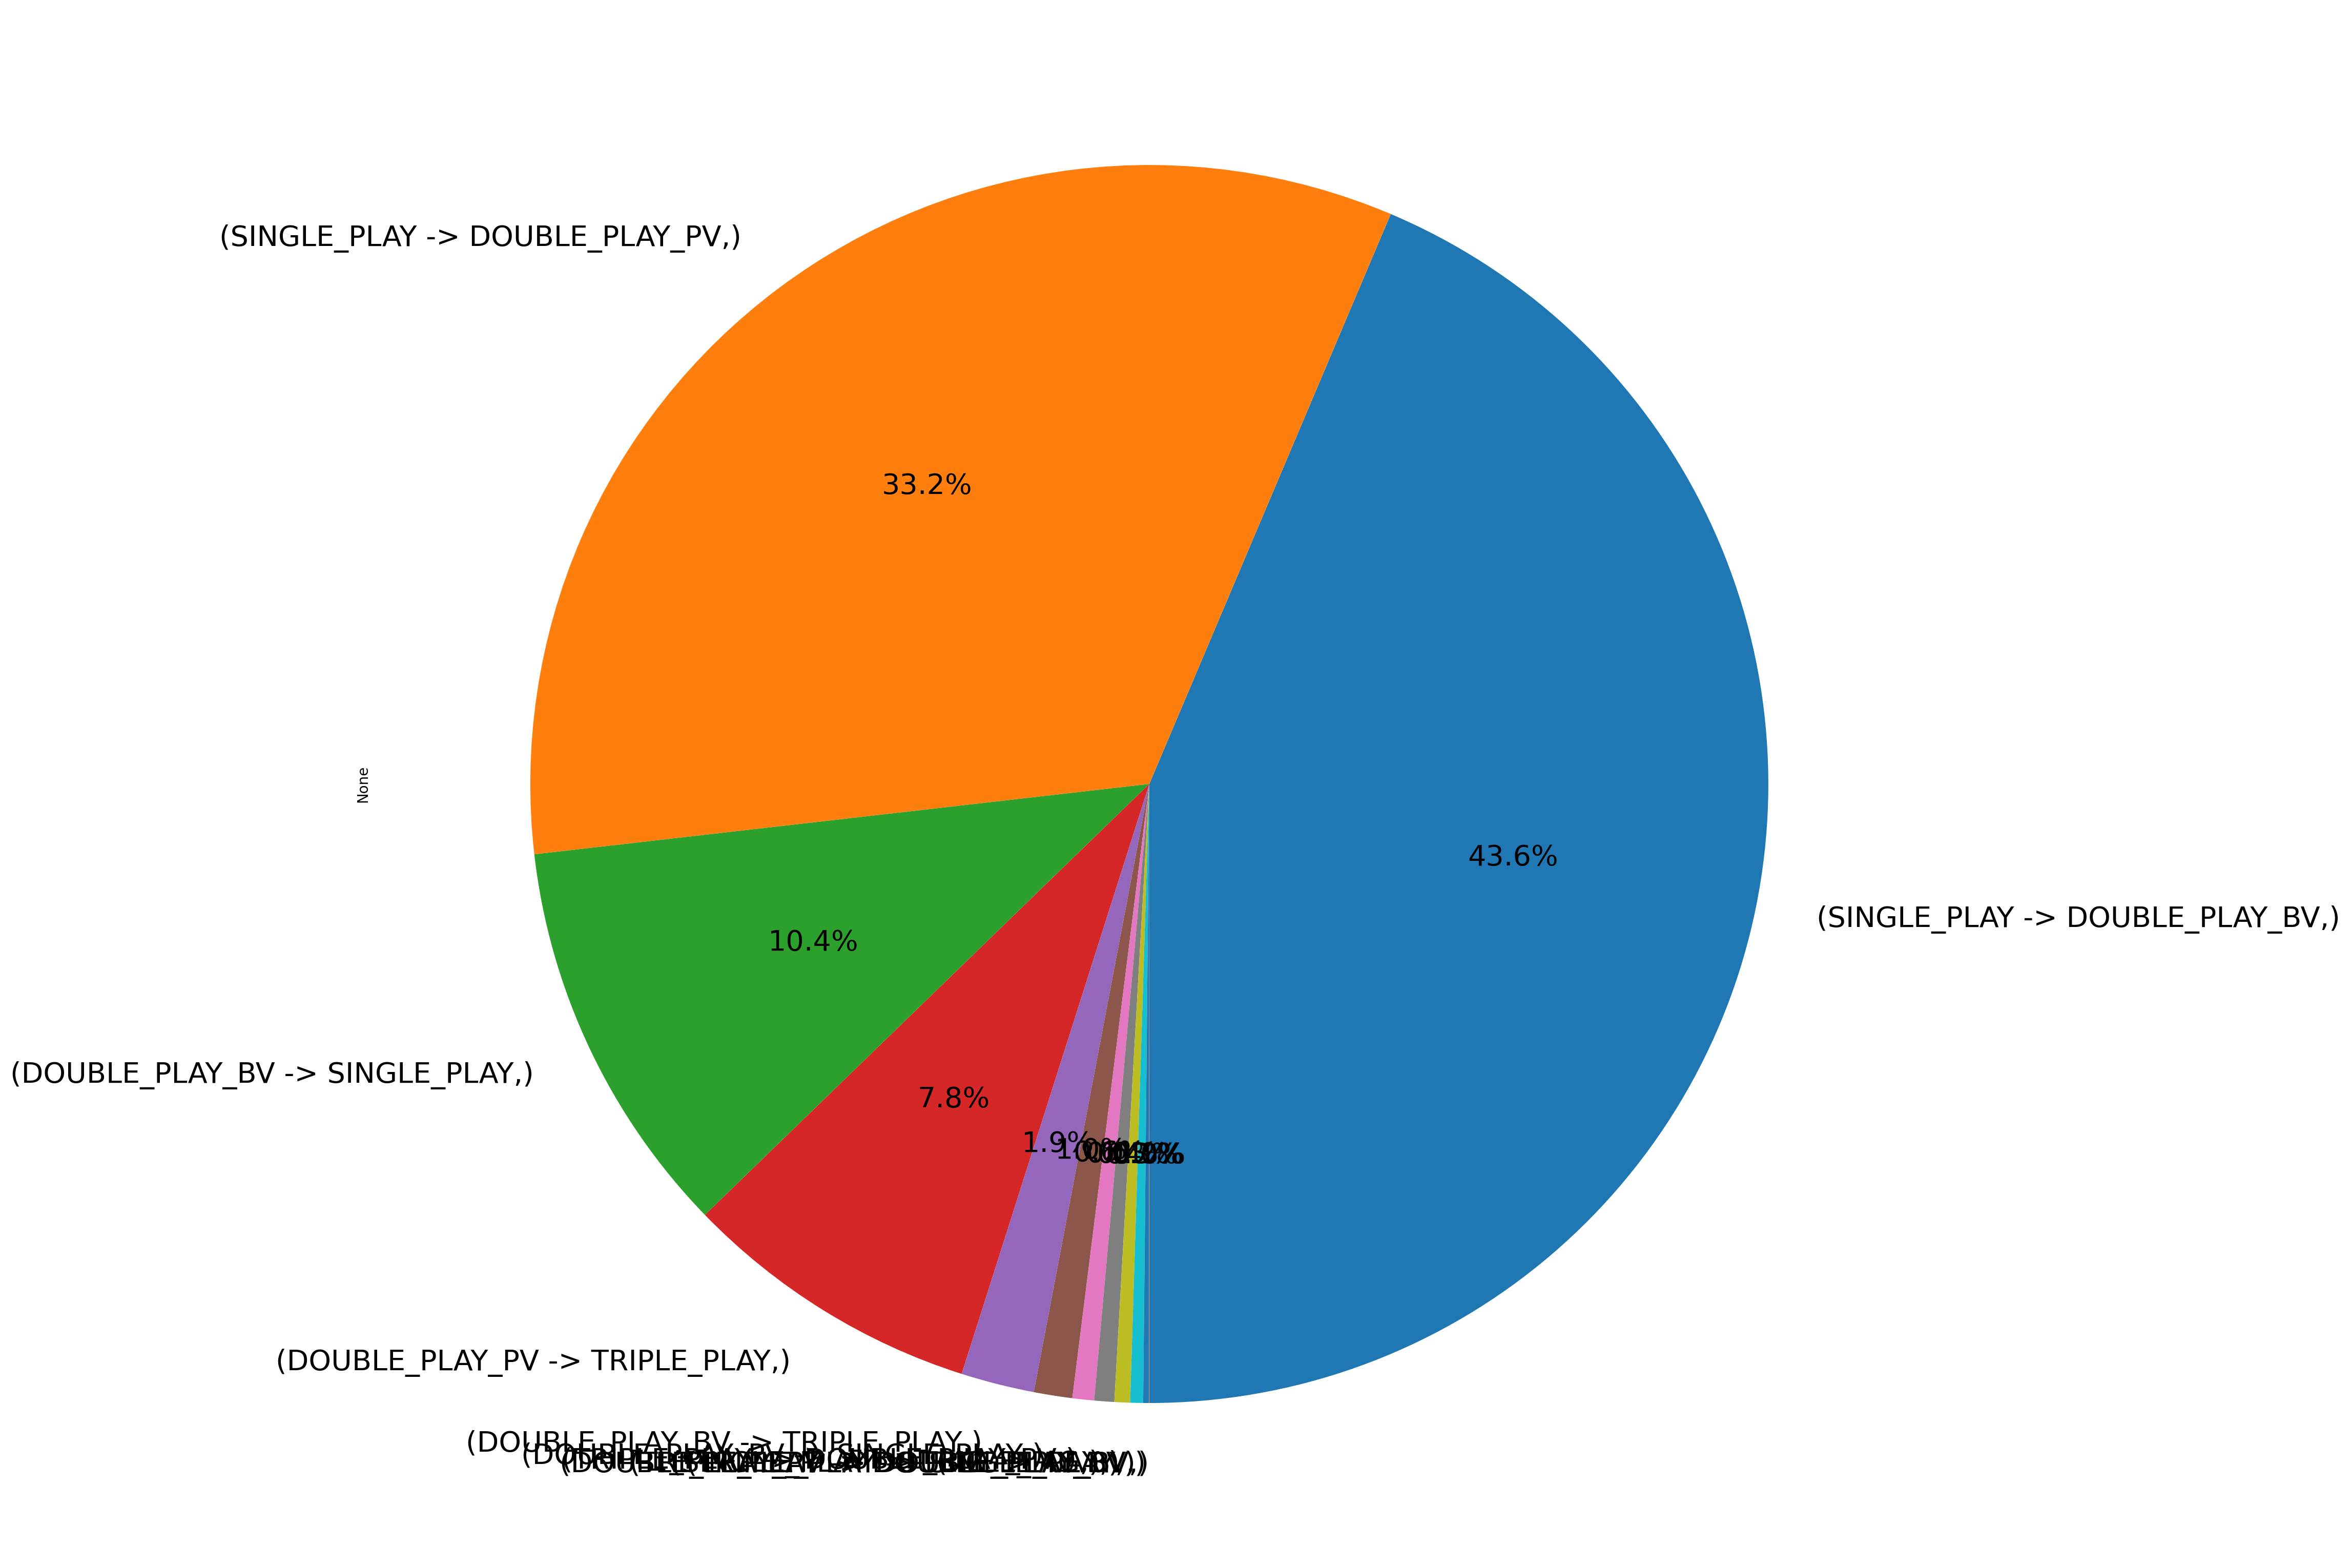

In [442]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

usage_df[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

## BB Extra GB Purchased

In [443]:
extra_GB_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","VAS"],axis=1, inplace=True)
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental"}, inplace=True)

In [444]:
extra_GB_df["BB_Extra_GB_Purchased_Times"]= 1

In [445]:
extra_GB_agg_df = extra_GB_df.groupby('event_source.hash', as_index=False).agg(list)

In [446]:
extra_GB_agg_df['BB_Extra_GB_Purchased_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Purchased_Times']), axis=1)

In [447]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

In [448]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [449]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month","BB_Extra_GB_Rental"],axis=1, inplace=True)

In [450]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   event_source.hash            314 non-null    object
 1   BB_Extra_GB_Purchased_Times  314 non-null    int64 
 2   BB_Extra_GB_Month_vs_Rental  314 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.8+ KB


In [451]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='event_source.hash')

In [452]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27555 entries, 0 to 27554
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_source.hash            27555 non-null  object 
 1   ACCOUNT_NUM.hash             27555 non-null  object 
 2   CUSTOMER_REF.hash            27555 non-null  object 
 3   ONNET_OUTGOING_Categorical   3078 non-null   object 
 4   ONNET_OUTGOING_Scaled        3078 non-null   float64
 5   ONNET_OUTGOING_Outlier       3078 non-null   object 
 6   ONNET_INCOMING_Categorical   3042 non-null   object 
 7   ONNET_INCOMING_Scaled        3042 non-null   float64
 8   ONNET_INCOMING_Outlier       3042 non-null   object 
 9   OFFNET_OUTGOING_Categorical  3015 non-null   object 
 10  OFFNET_OUTGOING_Scaled       3015 non-null   float64
 11  OFFNET_OUTGOING_Outlier      3015 non-null   object 
 12  OFFNET_INCOMING_Categorical  3114 non-null   object 
 13  OFFNET_INCOMING_

### Notes
- Extra GB usage information only present about **314** unique customers
- Information available for only **33** customers from the selected 3307 sample

# Deriving Contextual Features

## Socio-Economic features

### Having an Insurance?

In [453]:
usage_df["Other_VAS_Package"].unique()

array(["['P-Basic1_Tele Life', 'C_Sisu Connect']", nan,
       "['P_Sisu Connect']", "['P-Basic1_Tele Life', 'P_Sisu Connect']",
       "['P-Plus1_Tele Life']", "['AB_Megaline', 'AB_Megaline Startup']",
       "['P-Basic1_Tele Life']", "['P-Basic1_Tele Life', 'E_TSTV']",
       "['AB_Service Vacation']",
       "['AB_Megaline', 'AB_Megaline Startup', 'AB_Relocation']",
       "['E_TSTV']", "['Package Rental Through ADSL']",
       "['AB_Megaline Startup', 'AB_Megaline']",
       "['AB_Megaline', 'E_TSTV']", "['Meet Lite']",
       "['P_Sisu Connect', 'P-Basic1_Tele Life']", "['AB_Megaline']",
       "['P-Plus1_Tele Life', 'E_TSTV']",
       "['P-Basic1_Tele Life', 'Meet Lite']",
       "['AB_Copper Access Bearer', 'AB_Megaline', 'AB_Megaline Startup']",
       "['AB_Referral offer Discount', 'E_Referral offer Discount']",
       "['P_Sisu Connect', 'P-Plus4_Tele Life']",
       "['AB_Megaline', 'AB_Relocation']",
       "['AB_Megaline', 'AB_Rental Free']",
       "['AB_Copper Access Be

In [463]:
def having_insurance(other):
    insurrence_VAS = ["V_Telehealth", "V-Plus1_TeleLife","P-Basic1_Tele Life","P-Plus1_Tele Life","P-Basic2_Tele Life","C-Basic1_Tele Life","P-Plus4_Tele Life"]
    if not isinstance(other,float):
        for vas in insurrence_VAS:
            if vas in other:
                return "YES"

In [464]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["Other_VAS_Package"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers, Millenials
  - Age < 40 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

In [454]:
usage_df["Peo_VAS_Package"].unique()

array([nan, "['PEO TV GO_OTT_A-la carte channels']",
       "['BB_PeoTVGO Revenue code']", "['E_Video on Demand']",
       "['E_PeoTV Initiation', 'E_Video on Demand']",
       "['E_Video on Demand', 'E_PeoTV Initiation']",
       "['E_Video on Demand', 'E_SLT PeoTV Service']",
       "['PeoTVGo_Channel Package']",
       "['E_PeoTV Initiation', 'E_SLT PeoTV Service', 'E_Video on Demand']",
       "['E_SLT PeoTV Service', 'E_Video on Demand']",
       "['PEO TV GO_OTT_A-la carte channels', 'E_PeoTV Initiation', 'E_Video on Demand']",
       "['OTT_SLT PeoTV Go', 'PeoTVGo_Channel Package']",
       "['PeoTVGo_Channel Package', 'PEO TV GO_OTT_A-la carte channels']",
       "['E_Video on Demand', 'E_PeoTV Initiation', 'E_SLT PeoTV Service']",
       "['E_PeoTV Initiation', 'E_Video on Demand', 'E_SLT PeoTV Service']",
       "['E_Video on Demand', 'PEO TV GO_OTT_A-la carte channels']",
       "['PeoTVGo_Channel Package', 'BB_PeoTVGO Revenue code', 'PEO TV GO_OTT_A-la carte channels']"],
 

In [455]:
usage_df["Peo_TV_Package"].unique()

array([nan, 'PEO_SILVER', 'PEO_SILVER_PLUS', 'PEO_RELIGIOUS_PACKAGE',
       'NEW_SLT_STAFF_PACKAGE', 'PEO_UTHAYAM', 'PEO_TITANIUM',
       'PEO_UNNATHAM', 'PRANAMA', 'LOTUS', 'PEO_ENTERTAINMENT',
       'PEO_SILVER_PLUS_FTTH', 'SLTStaff_PEO_SILVER', 'PEO_PLATINUM',
       'DOUBLEPROMO', 'NEW_YEAR_TREAT', 'PEO_FAMILY', 'PEO_GOLD',
       'PEO_SILVER_FTTH', 'LEISURE_SPORTS', 'BOC',
       'SLT_STAFF_PEO_UNNATHAM_FTTH', 'SLT_STAFF_TRIPLE_PLAY'],
      dtype=object)

In [51]:
def household_types(idd,usage):
    household=[]
    if ("VOICE_HIGH" in usage) and ("TV_HIGH" in usage):
        household.append("Senior_Citizen")
    if "TV_HIGH" in usage:
        household.append("Kids")
    if "BB_HIGH" in usage:
        household.append("Professional_or_Student")
    if idd == "HIGH":
        household.append("Family_Member_Abroad")
    if len(household)>0:
        return household

In [52]:
# test
household_types("HIGH",'["VOICE_HIGH","BB_NO","TV_HIGH"]')

['Senior_Citizen', 'Kids', 'Family_Member_Abroad']

In [53]:
usage_df["Household_Types"] = usage_df.apply(lambda x: household_types(x["IDD_Overall_Categorical"],x["Play_Usage"]), axis=1)

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

In [57]:
usage_df.to_csv("data/user_profile/prepared/User_Profile.csv")

# Selecting Sub Dataframes for Analysis

In [343]:
voice_udf = usage_df[(usage_df["ONNET_OUTGOING_Categorical"].notnull())]
voice_udf["Sub_Type"].value_counts()

TRIPLE_PLAY       2412
DOUBLE_PLAY_BV     277
SINGLE_PLAY        243
DOUBLE_PLAY_PV     145
4G                   1
Name: Sub_Type, dtype: int64

In [ ]:
cat_cols = ['ONNET_OUTGOING_Categorical', 'ONNET_INCOMING_Categorical', 'OFFNET_OUTGOING_Categorical', 'OFFNET_INCOMING_Categorical',
            'IDD_INCOMING_Categorical','IDD_OUTGOING_Categorical','Peo_TV_Package', 'PEO_TV_Categorical','BB_Categorical',
           'IDD_OUTGOING_Outlier','OFFNET_OUTGOING_Outlier','ONNET_OUTGOING_Outlier','ONNET_INCOMING_Outlier','ONNET_INCOMING_Outlier'
           ,'IDD_INCOMING_Outlier']

scaled_cols = ['ONNET_OUTGOING_Scaled', 'ONNET_INCOMING_Scaled', 'OFFNET_OUTGOING_Scaled', 'OFFNET_INCOMING_Scaled','IDD_INCOMING_Scaled'
        ,'IDD_OUTGOING_Scaled','PEO_TV_Scaled','BB_Scaled']

voice_udf[cat_cols] = voice_udf[cat_cols].fillna("NO")

voice_udf[scaled_cols] = voice_udf[scaled_cols].fillna(0)

In [ ]:
voice_udf.to_csv("data/user_profile/prepared/User_Profile_for_Voice_Analysis.csv")

# Analysis

## Customers with Voice VAS

In [473]:
usage_df.apply(lambda x: "YES" if  type(x["Voice_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     23559
YES     3996
dtype: int64

## Customers with PeoTV VAS

In [474]:
usage_df.apply(lambda x: "YES" if  type(x["Peo_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     27416
YES      139
dtype: int64

## Customers with BB Vas

In [475]:
usage_df.apply(lambda x: "YES" if  type(x["BB_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     21283
YES     6272
dtype: int64

## Customers with Uncategorized VAS

In [476]:
usage_df.apply(lambda x: "YES" if  type(x["Other_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     20415
YES     7140
dtype: int64

## Customers with PeoTV Packages

In [471]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) == str else "NO", axis=1)
peo_tv_users.value_counts()

NO     26306
YES     1249
dtype: int64

## Customers with at least one product

In [472]:
users_with_products = usage_df.apply(lambda x: "YES" if type(x["Other_VAS_Package"]) == str or type(x["Voice_VAS_Package"]) == str or type(x["Peo_TV_Package"]) == str or type(x["Peo_VAS_Package"]) == str or type(x["BB_VAS_Package"]) == str else "NO", axis=1)
users_with_products.value_counts()

NO     16344
YES    11211
dtype: int64